In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import simps 
import matplotlib.pyplot as plt

In [2]:
def theoretical_3C286(freq):
    freq = freq/1000 		# changing frequencies into GHz
    a =  1.2481
    b = -0.4507
    c = -0.1798
    d =  0.0357
    fd = 10**(a + b*np.log10(freq) + c*(np.log10(freq))**2 + d*(np.log10(freq))**3)
    return fd

def theoretical_3C48(freq):
    freq = freq/1000 		# changing frequencies into GHz
    a = 1.3253 
    b = -0.7553
    c = -0.1914
    d = 0.0498
    fd = 10**(a + b*np.log10(freq) + c*(np.log10(freq))**2 + d*(np.log10(freq))**3)
    return fd

In [3]:
onSrc_3C286 = pd.read_csv("./3C286_Mar_9.txt", header=None, delim_whitespace=True)
offSrc_3C286 = pd.read_csv("./3C286OFF_Mar_9.txt", header=None, delim_whitespace=True)

In [4]:
onSrc_3C286.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,44493.269531,71613.085938,83651.515625,88993.039062,105478.882812,127428.468750,124498.554688,131995.156250,144222.718750,141320.984375,148950.625000,193377.187500,162654.437500,160698.140625,113579.078125,67513.781250
1,2,44466.113281,71620.867188,83686.742188,88976.570312,105454.523438,127438.500000,124485.601562,131965.265625,144227.656250,141343.546875,148985.671875,193392.984375,162629.546875,160694.984375,113576.375000,67530.210938
2,3,44496.410156,71623.054688,83657.562500,88987.976562,105470.406250,127417.140625,124492.601562,132028.078125,144268.703125,141341.906250,148966.078125,193393.453125,162660.984375,160661.171875,113539.007812,67517.187500
3,4,44481.996094,71615.476562,83666.398438,88980.531250,105497.054688,127420.695312,124536.351562,131991.078125,144242.203125,141327.312500,148953.406250,193387.265625,162639.406250,160639.546875,113566.820312,67526.273438
4,5,44493.660156,71648.992188,83673.734375,88980.757812,105482.812500,127398.093750,124523.921875,132020.156250,144206.359375,141335.296875,149007.968750,193362.750000,162636.859375,160617.250000,113579.828125,67539.031250


In [5]:
J1939_data = pd.read_csv("./J1939_profile_Mar_3.txt", header=None, delim_whitespace=True)

In [25]:
J1939_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,40501.199219,53872.363281,63630.832031,65740.585938,74761.234375,92755.179688,90253.304688,96323.500000,100275.664062,98908.789062,104161.156250,134662.140625,119520.164062,114012.726562,86588.843750,64245.371094
1,2,40498.277344,53871.703125,63637.191406,65739.562500,74814.039062,92754.273438,90272.117188,96323.023438,100280.625000,98913.000000,104247.250000,134712.531250,119523.882812,114002.773438,86570.898438,64245.332031
2,3,40497.562500,53878.625000,63633.718750,65737.804688,74834.562500,92753.695312,90251.671875,96327.445312,100276.953125,98948.429688,104207.460938,134733.015625,119527.703125,114019.257812,86560.929688,64243.152344
3,4,40499.847656,53871.914062,63633.781250,65740.218750,74788.906250,92754.843750,90242.562500,96323.070312,100278.835938,98948.117188,104151.726562,134693.921875,119594.093750,114014.531250,86559.687500,64245.667969
4,5,40501.175781,53875.921875,63633.921875,65739.117188,74754.539062,92757.976562,90239.281250,96326.351562,100283.765625,98920.968750,104122.742188,134663.453125,119700.523438,113999.179688,86558.343750,64249.550781


-3.637978807091713e-12
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-7.275957614183426e-12
0.0
-3.637978807091713e-12


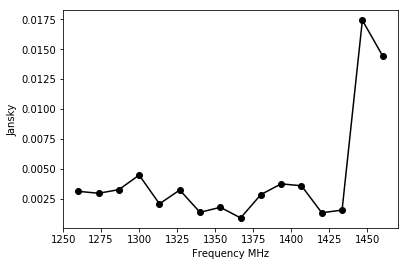

In [32]:
# x = 14 
%matplotlib inline
fluxDensArray = []
profiles_all_freq = []
telescope_counts_all_freq = []
scaling_factor_all_freq = []
freq_range = [] 
counts_3C286 = []
counts_3C286OFF = []
for x in range (1, 17):
    onSrc_3C286_median = np.nanmedian(onSrc_3C286[x])
    offSrc_3C286_median = np.nanmedian(offSrc_3C286[x])
    counts_3C286.append(onSrc_3C286_median)
    counts_3C286OFF.append(offSrc_3C286_median)

    scaling_factor = \
    theoretical_3C286(1460-(x*(200.0/16)))/np.nanmedian(onSrc_3C286[x] - offSrc_3C286[x])
#     print(theoretical_3C286(1460-(x*(200.0/16))))
    scaling_factor_all_freq.append(scaling_factor)
    freq_range.append(1460-(x*(200.0/16)))
    
#     SEFD_J1939 = J1939_data[x] * scaling_factor
    reduced_counts = J1939_data[x] - np.median(J1939_data[x])
    print(np.median(reduced_counts))
    reduced_SEFD_J1939 = reduced_counts * scaling_factor
#     print(np.median(SEFD_J1939))
    telescope_counts_all_freq.append(reduced_counts)
#     reduced_SEFD_J1939 = SEFD_J1939 - np.median(SEFD_J1939)
    profiles_all_freq.append(reduced_SEFD_J1939)
    new_avg_FD = np.sum(reduced_SEFD_J1939) / 32
    fluxDensArray.append(new_avg_FD)

plt.plot(np.linspace(1260, 1460, 16), list(reversed(fluxDensArray)), '-ok')
plt.ylabel("Jansky")
plt.xlabel("Frequency MHz")
# plt.savefig("Frequency dist of FluxDens.pdf")
# plt.plot(np.log(np.linspace(1260, 1460, 16)), np.log(fluxDensArray), '-ok')
plt.show()
    

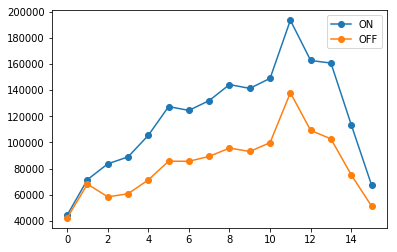

In [33]:
%matplotlib inline
plt.plot(range(16), counts_3C286, '-o', label="ON")
plt.plot(range(16), counts_3C286OFF, '-o', label="OFF")
plt.legend()
plt.show()

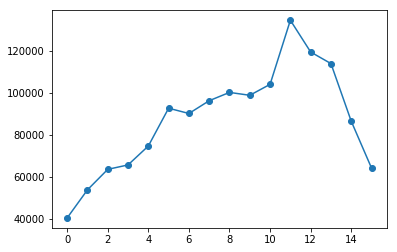

In [26]:
%matplotlib inline
plt.plot(range(16), np.median(np.array(telescope_counts_all_freq), axis=1), '-o')
plt.show()

In [21]:
scaleFactorsDF = pd.DataFrame(np.array([freq_range, scaling_factor_all_freq]).T)
scaleFactorsDF.columns = ['Freq (MHz)', 'scale factor']
scaleFactorsDF.to_csv("Freq wise scale factors.csv")

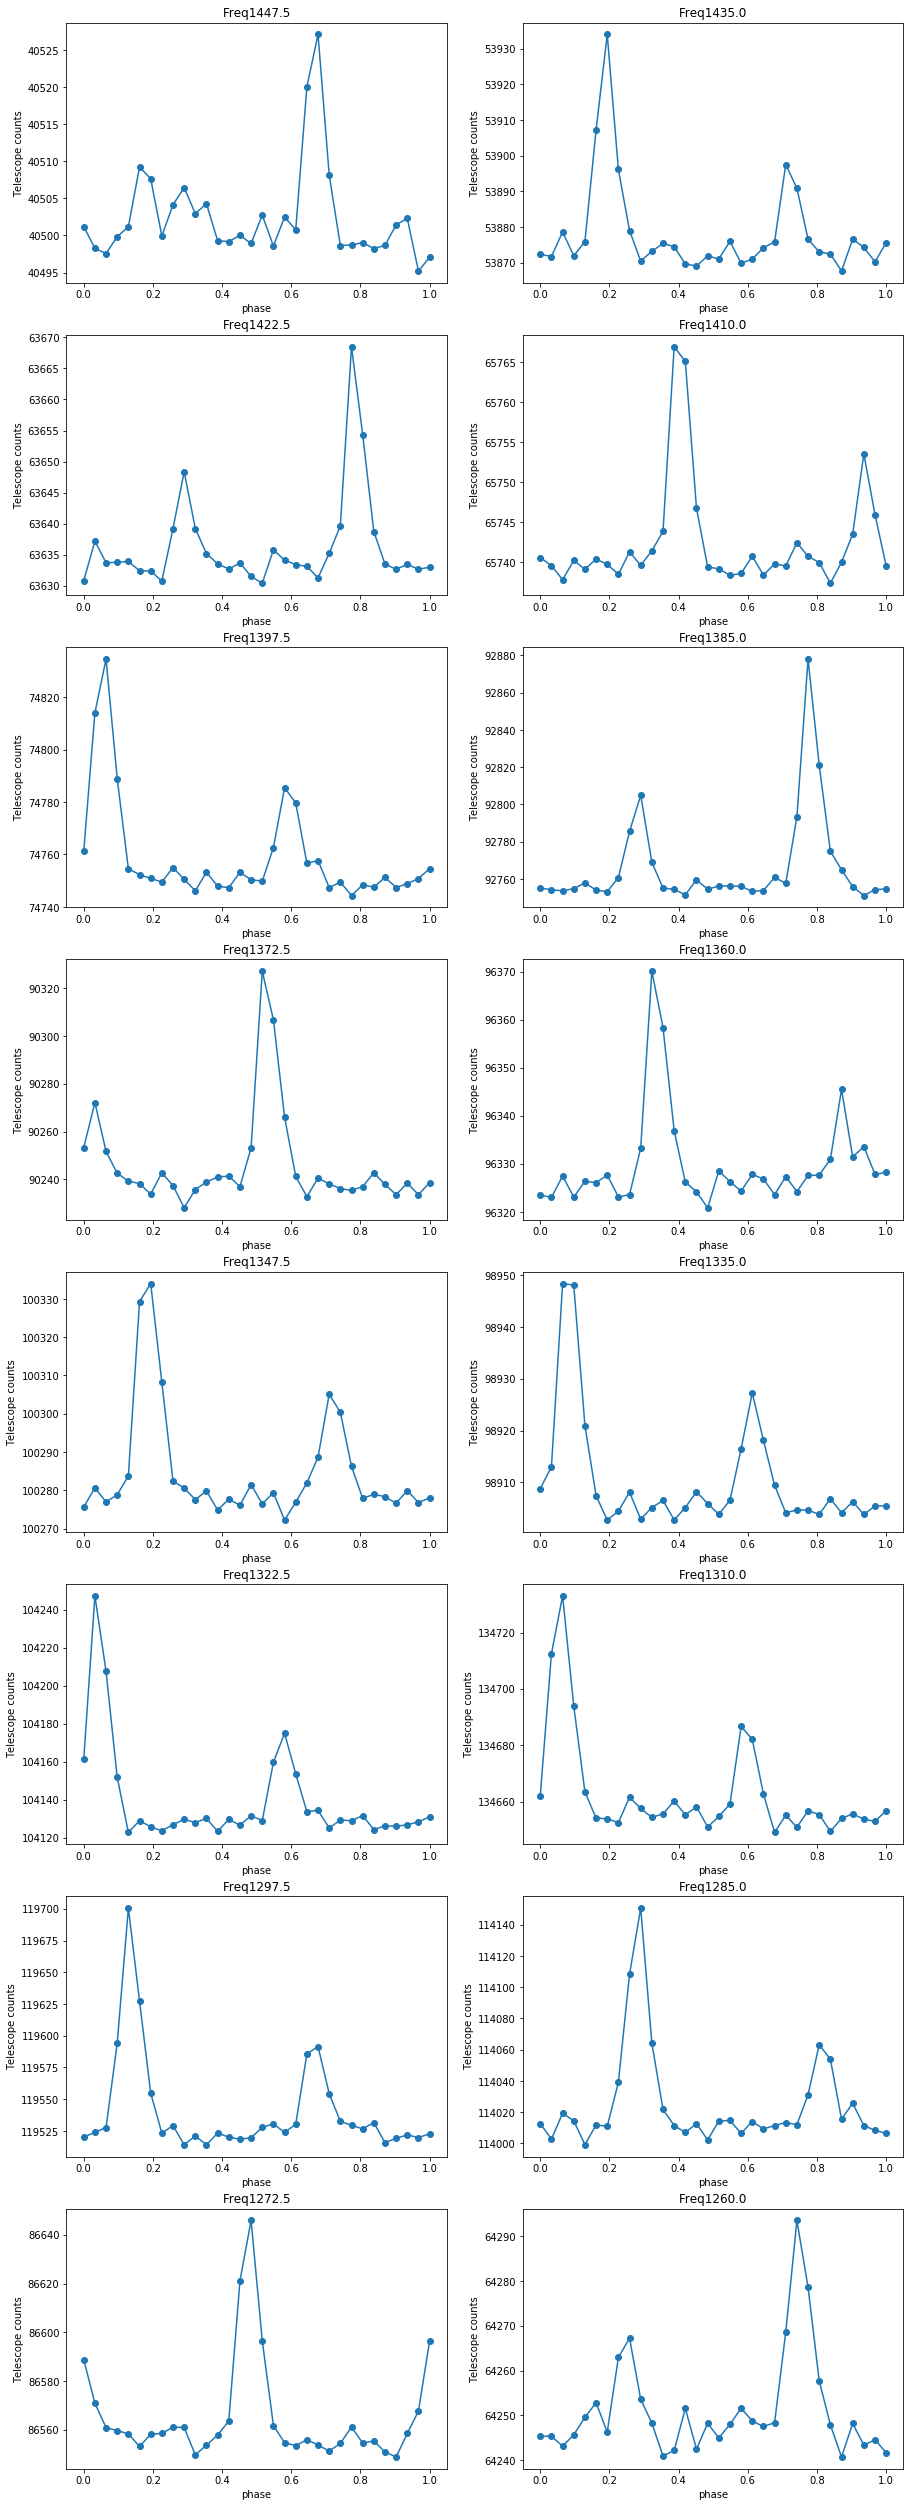

In [8]:
%matplotlib inline
plt.figure(figsize=(15, 45))
for i in range (16):
    plt.subplot(8, 2, i+1)
    plt.plot(np.linspace(0, 1, 32), telescope_counts_all_freq[i], '-o')
    plt.title("Freq" + str(1460-((i+1)*(200.0/16))))
    plt.xlabel("phase")
    plt.ylabel("Telescope counts")
plt.savefig("Unscaled_All_Frequency_Profiles.pdf")    
plt.show()

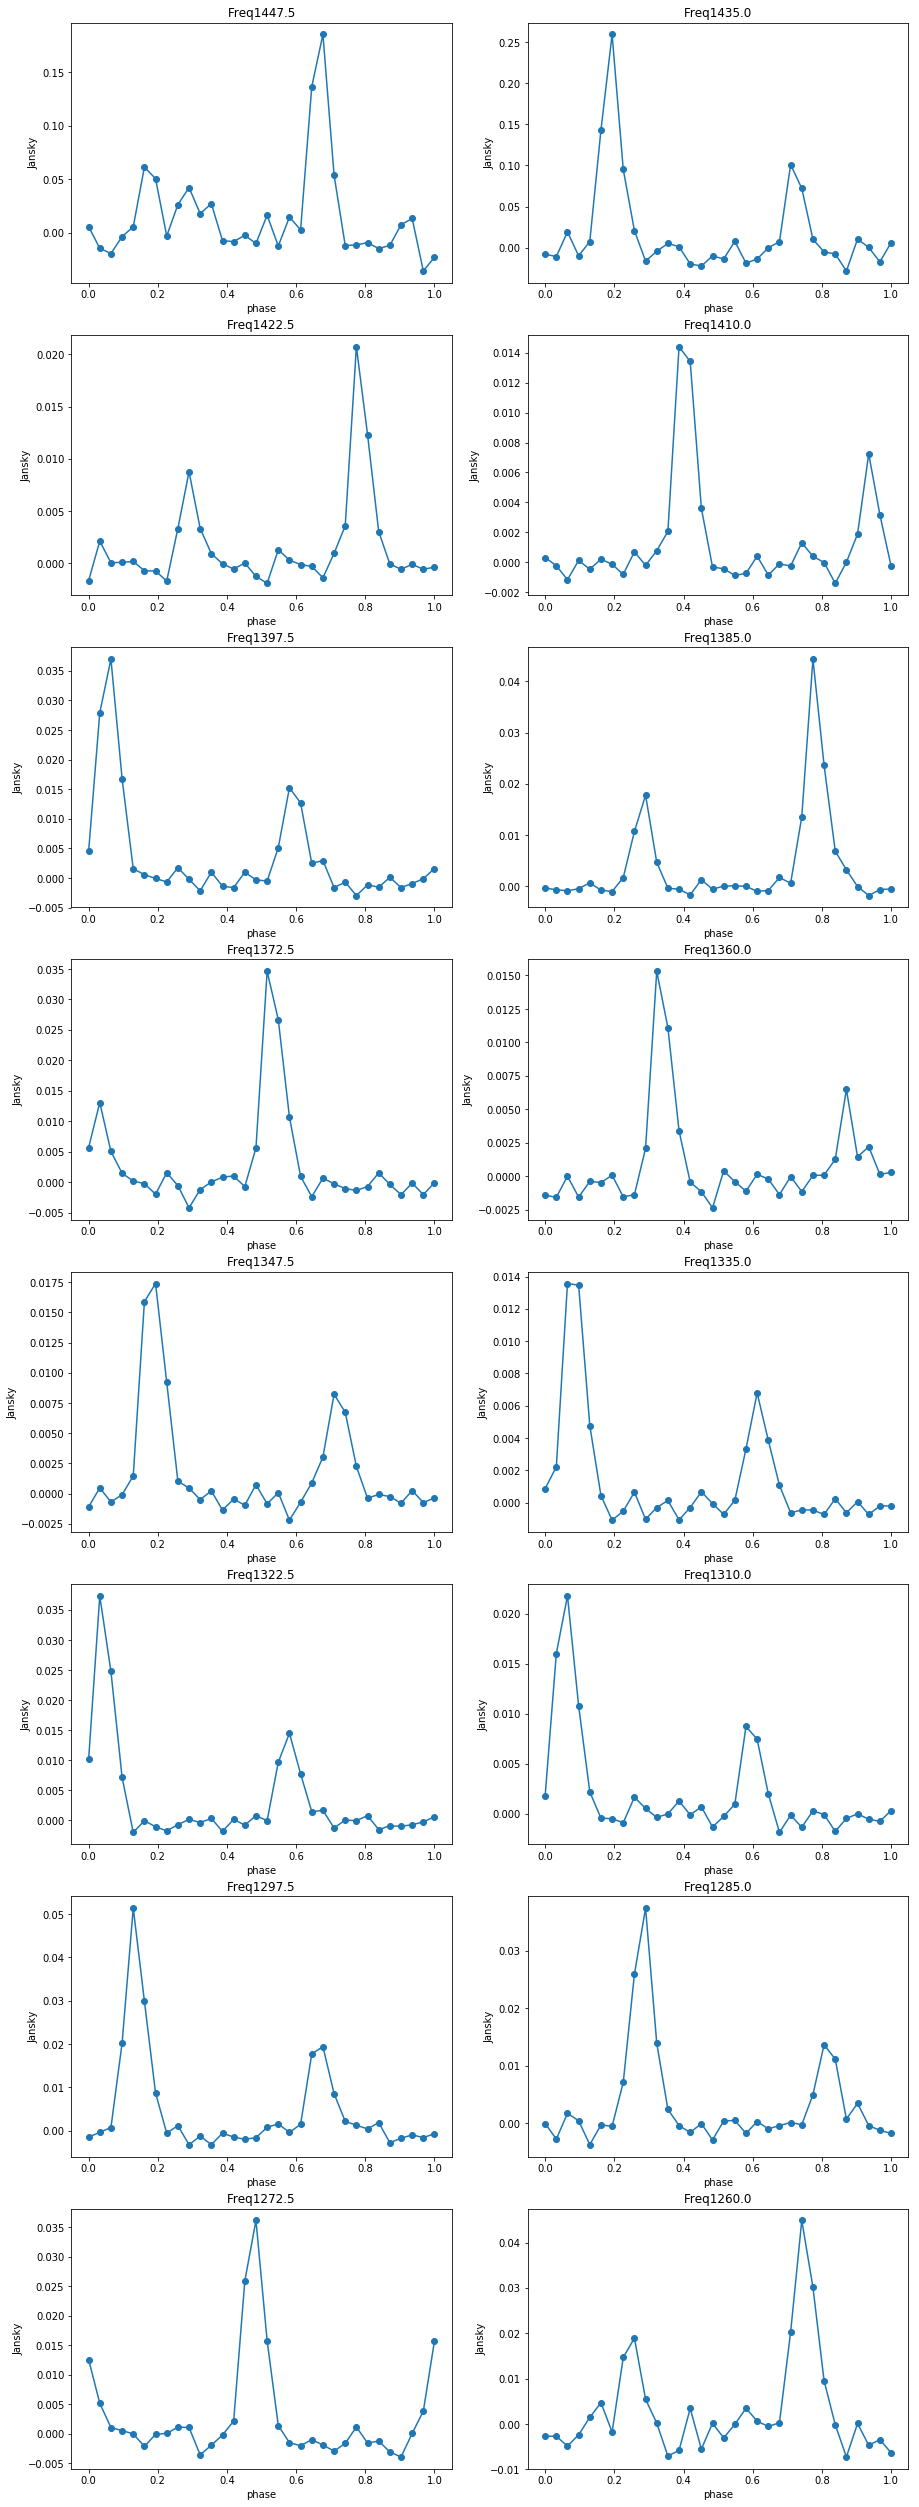

In [31]:
%matplotlib inline
plt.figure(figsize=(15, 45))
for i in range (16):
    plt.subplot(8, 2, i+1)
    plt.plot(np.linspace(0, 1, 32), profiles_all_freq[i], '-o')
    plt.title("Freq" + str(1460-((i+1)*(200.0/16))))
    plt.xlabel("phase")
    plt.ylabel("Jansky")
plt.savefig("Scaled_All_Frequency_Profiles.pdf")    
plt.show()

In [17]:
SEFD_3C286 = scaling_factor * offSrc_3C286_median
SEFD_J1939 = np.median(scaling_factor * J1939_data[x])
print ("SEFD of 3C286:",SEFD_3C286)
print ("SEFD of J1939:",SEFD_J1939)

SEFD of 3C286: 50.81172475770594
SEFD of J1939: 63.460482111961454


In [18]:
SEFD_J1939 = J1939_data[x] * scaling_factor
reduced_SEFD_J1939 = SEFD_J1939 - np.median(SEFD_J1939)

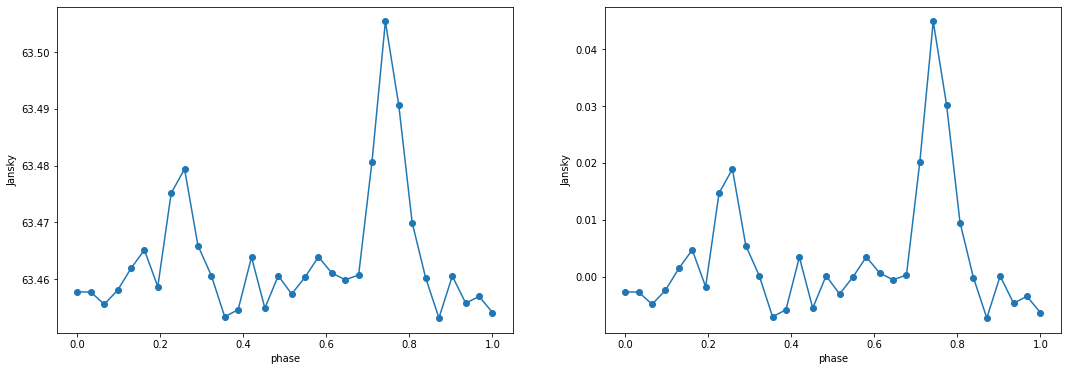

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, 1, 32), SEFD_J1939, '-o')
plt.xlabel("phase")
plt.ylabel("Jansky")
plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, 1, 32), reduced_SEFD_J1939, '-o')
plt.xlabel("phase")
plt.ylabel("Jansky")
plt.show()